Actually, considering that we have circular pupil, a out-of-focus point object will be seen as a donut. Convolving this "Point-Spread-Function" with the apparent shape of the satellite could give us a trail cross-section with a double peak structure.

Below we assume the apparent shape is a 2 x 2 m square.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LEOSat import getSatSIIvonK, getSatSII

In [2]:
#satellite parameters
l1 = 2 # 0.5 #2 #1.5 #meter
l2 = 2 #0.5 #2 #meter
h = 550e3

In [3]:
f=15
d=8.3
pixel_size = 15 #micron
plate_scale = 0.2
e = 1.2/8.3
seeing = 0.77  #this is for the zenith angle below
zangle = 62.063

In [4]:
vonk = 0

In [5]:
if not vonk:
    [sii, fwhm_exp] = getSatSII(f,d,e, l1, l2, h, zangle, seeing, pixel_size, plate_scale)
    plot_pixel_size = 1 #microns
else:
    [sii, fwhm_exp, plot_pixel_size] = getSatSIIvonK(f,d,e, l1, l2, h, zangle, seeing, pixel_size, plate_scale)

donutR = 53 micron, satellite conv kernel = 26 x 26 microns
padding =  5
expected FWHM = 126 microns


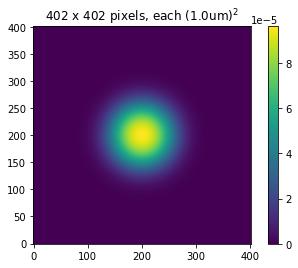

In [6]:
plt.imshow(sii, origin='lower')
plt.colorbar()
[n1, n2] = sii.shape
plt.title('%d x %d pixels, each (%.1fum)$^2$'%(n1,n2,plot_pixel_size));

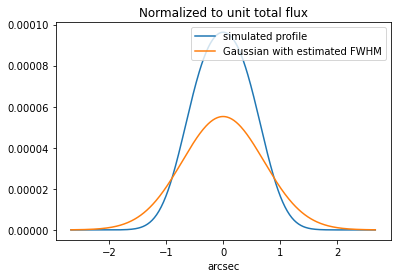

In [7]:
aa = sii[int(n1/2),:]
x1 = np.linspace(-(n1-1)/2, (n1-1)/2, n1)
x2 = np.linspace(-(n2-1)/2, (n2-1)/2, n2)
[x, y] = np.meshgrid(x2,x1)
r = np.sqrt(x**2+y**2)
pred = np.exp(-r**2/2/(fwhm_exp/2.355)**2)
pred = pred/np.sum(pred)
xp = x2/pixel_size*plate_scale*plot_pixel_size #display arcsec as x axis from now on
xpg = x2/pixel_size*plate_scale
plt.plot(xp, aa, label='simulated profile')
plt.plot(xpg, pred[int(n1/2),:], label='Gaussian with estimated FWHM')
plt.xlabel('arcsec')
plt.legend()
plt.title('Normalized to unit total flux');

(-3.0, 3.0)

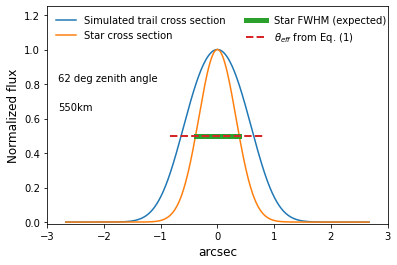

In [8]:
fig, ax = plt.subplots(figsize=(6.1,4))
aa =np.sum(sii,axis=0)
n_shift =  int((len(aa)-1)/2 - np.argmax(aa==max(aa)))
aa = np.roll(aa, n_shift)
plt.plot(xp, aa/np.max(aa),label='Simulated trail cross section');
#plt.plot(x2/pixel_size, np.sum(sii,axis=0),label='2m');
#plt.plot(x1/pixel_size, np.sum(sii,axis=1), label='1.5m'); #uncomment this if the apparent shape of LEOSat is not square, i.e, 1.5x2m
#plt.plot(x2/pixel_size, np.sum(pred,axis=0),label='pred');
#plt.plot([-fwhm_exp/pixel_size/2, fwhm_exp/pixel_size/2],[max(np.sum(pred,axis=0))/2, max(np.sum(pred,axis=0))/2])
s = np.exp(-x2**2/2/(seeing/plate_scale*pixel_size/2.355)**2)
plt.plot(xpg,s, label = 'Star cross section')
plt.plot([-seeing/2, seeing/2],[0.5, 0.5], '-', linewidth = 5, label='Star FWHM (expected)')
plt.plot([-fwhm_exp/pixel_size*plate_scale/2, fwhm_exp/pixel_size*plate_scale/2],[0.5, 0.5],'--', linewidth = 2, label=r'$\theta_{eff}$ from Eq. (1)')
plt.text(0.15, 0.62, "%.0f deg zenith angle"%zangle, color = 'black', transform=fig.transFigure)
plt.text(0.15, 0.52, "550km", color = 'black', transform=fig.transFigure)
plt.legend(loc='upper left', framealpha=0., ncol = 2)
#plt.legend(fontsize=15, bbox_to_anchor=(0., 0.5, 0.5, 0.3), framealpha=0.)
#plt.grid()
plt.ylim([-0.01, 1.25])
plt.xlabel('arcsec', fontsize=12)
plt.ylabel('Normalized flux', fontsize=12)
plt.xlim([-3,3])
#plt.savefig('sat_profile.pdf')

In [9]:
print('seeing (at zenith angle = %.0f deg) = %.2f, estimated FWHM = %.2f'%(
    zangle, seeing, fwhm_exp/pixel_size*plate_scale))

seeing (at zenith angle = 62 deg) = 0.77, estimated FWHM = 1.69


In [10]:
print('airmass = %.2f'%(1/np.cos(np.radians(zangle))))

airmass = 2.13


#### Plot integrated flux vs mask_width

In [11]:
npoints = 60
mw = np.arange(npoints)*6.0/npoints
flux = np.zeros(npoints)
for i, w in enumerate(mw):
    idx = abs(xp)>= w/2
    flux[i] = np.sum(aa[idx])

In [12]:
mask_width = [5, 3, 1.75, 1.2, 1, .7, .5, 0]
integrated_flux = [743.19, 6157.73, 9905.22, 13452.23, 17200.56, 21379.66, 26272.73, 314285.013]
yerr = [206.800, 595.264, 754.974, 879.827, 994.881, 1109.175, 1229.568, 4252.671]

Text(0, 0.5, 'Integrated flux (nJy)')

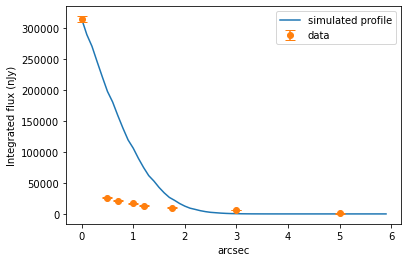

In [13]:
plt.plot(mw, flux*integrated_flux[-1], label='simulated profile')
plt.errorbar(mask_width, integrated_flux, yerr, ls='none', label='data', marker='o', capsize=5)
#plt.ylim([0, 35000])
plt.legend()
plt.xlabel('arcsec')
plt.ylabel('Integrated flux (nJy)');

In [14]:
x0 = np.linspace(-6,6, 1201)
y0 = np.exp(-x0**2/2/(seeing/2.355)**2)

(-1.0, 1.0)

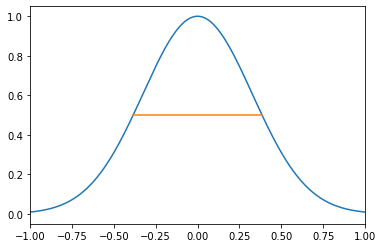

In [15]:
plt.plot(x0,y0)
plt.plot([-seeing/2, seeing/2],[0.5, 0.5], '-')
plt.xlim([-1,1])

In [16]:
total_flux = sum(y0)
use_mask_width = 0.5
print('for a Gaussian of width %.2f arcsec, %.2f %% flux is outside of a mask with width = %.1f arcsec'%(
    seeing, 100*(1-sum(y0[abs(x0)< use_mask_width/2])/total_flux),use_mask_width))

for a Gaussian of width 0.77 arcsec, 45.36 % flux is outside of a mask with width = 0.5 arcsec


In [17]:
print('The data given has %.2f %% outside of a mask with width = %.1f arcsec'%(
    integrated_flux[-2]/integrated_flux[-1]*100, mask_width[-2]))

The data given has 8.36 % outside of a mask with width = 0.5 arcsec
